In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

DATA_PATH = "/content/drive/MyDrive/final/data/"
SEED = 42

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [3]:
reset_seeds(SEED)

In [4]:
df = pd.read_csv(f"{DATA_PATH}아모레크롤링_스킨케어 (1).csv")
df

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰
0,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,0103*******,5,2022.09.27,40대,여성,지성,모공,남편이 극지성이에요. 원래 수퍼화산송이 미셀라만 꾸준히 사용해 오다가 지성 전용이라...
1,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,lsm2***,5,2022.08.15,40대,여성,건성,건조함,여름이라 집에 와서 메이크업 클렌징 해줄때 꼭 이중세안 해주는데 이 폼 클렌징으로 ...
2,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,gpdl***,5,2022.12.24,20대,여성,복합성,트러블,이니스프리 폼클렌징은 피부에 자극적이지 않아 좋아요 선크림만 사용해도 꼭 폼까지 써...
3,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,zoll***,5,2022.09.30,30대,여성,건성,건조함,저희 엄마가 이 제품이 클렌징이 제일 잘된다고 좋아하서 1+1 이벤트하길래 4개 쟁...
4,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,snow****,5,2022.09.30,50대 이상,여성,지성,모공,여름이라서 모공이 넓어지는것 같아서 구매해서 사용해보니 촉촉하고 피부땡기지 않아서 ...
...,...,...,...,...,...,...,...,...,...,...,...
112763,스킨케어,프리메라,모이스처 클렌징 티슈 300g,drea****,5,2020.01.11,40대,여성,복합성,모공,자극적이지 않고 순하게 화장을 지워주어 좋아요.
112764,스킨케어,프리메라,모이스처 클렌징 티슈 300g,kim4***,5,2022.05.11,50대 이상,여성,복합성,칙칙함,순하고 화장도 잘지워지고 기름지지않아서 좋아요 ~~^^
112765,스킨케어,프리메라,모이스처 클렌징 티슈 300g,hyej*****,4,2022.04.12,40대,여성,수분부족지성,탄력없음,클렌징티슈는 이것만 사용해요 자극 덜하고 향도 좋아요~
112766,스킨케어,프리메라,모이스처 클렌징 티슈 300g,sooh*****,4,2019.08.31,40대,여성,수분부족지성,모공,제 인생템 중 하나입니다 없으면 불안해져 쟁여놓고 쓴답니다~


In [7]:
# '나이', '성별', '피부타입', '피부트러블'을 조합하여 가상유저 생성
df['가상유저'] = df['나이'] + ',' + df['성별'] + ',' + df['피부타입'] + ',' + df['피부트러블']

# '브랜드명', '상품명', '가상유저'만 포함하는 데이터프레임 생성
virtual_user_df = df[['브랜드명', '상품명', '가상유저']].drop_duplicates().reset_index(drop=True)

virtual_user_df

,브랜드명,상품명,가상유저
0,이니스프리,화산송이 모공 바하 클렌징 폼 150g,"40대,여성,지성,모공"
1,이니스프리,화산송이 모공 바하 클렌징 폼 150g,"40대,여성,건성,건조함"
2,이니스프리,화산송이 모공 바하 클렌징 폼 150g,"20대,여성,복합성,트러블"
3,이니스프리,화산송이 모공 바하 클렌징 폼 150g,"30대,여성,건성,건조함"
4,이니스프리,화산송이 모공 바하 클렌징 폼 150g,"50대 이상,여성,지성,모공"
...,...,...,...
36471,프리메라,모이스처 클렌징 티슈 300g,"40대,남성,중성,칙칙함"
36472,프리메라,모이스처 클렌징 티슈 300g,"40대,여성,극건성,주름"
36473,프리메라,모이스처 클렌징 티슈 300g,"50대 이상,여성,지성,주름"
36474,프리메라,모이스처 클렌징 티슈 300g,"20대,여성,중성,칙칙함"


In [8]:
user_product_purchase_count = df.groupby('가상유저')['상품명'].value_counts().reset_index(name='구매횟수')
user_product_rating_avg = df.groupby(['가상유저', '상품명'])['별점'].mean().reset_index(name='평균별점')
user_product_info = pd.merge(user_product_purchase_count, user_product_rating_avg, on=['가상유저', '상품명'])

In [9]:
user_product_info

,가상유저,상품명,구매횟수,평균별점
0,"10대,남성,건성,건조함",비자 트러블 클렌징폼 150g,2,5.0
1,"10대,남성,건성,건조함",알파인 베리 워터리 크림 50ml,1,5.0
2,"10대,남성,건성,민감성",파워부스팅 스페셜세트 2종,1,5.0
3,"10대,남성,건성,주름",리페어링 세라캡슐 UV프로텍터 SPF50+/PA++++ 40ml,1,4.0
4,"10대,남성,건성,주름",알파인베리 워터리 크림 75ml,1,5.0
...,...,...,...,...
36471,"50대 이상,여성,지성,트러블",포어 클린 토너 250ml,1,5.0
36472,"50대 이상,여성,지성,트러블",프로바이오틱스 세라마이드 2종,1,5.0
36473,"50대 이상,여성,지성,트러블",플라워 앰플 마스크팩 1매,1,5.0
36474,"50대 이상,여성,지성,트러블",화산송이 모공 바하 클렌징 폼 150g,1,5.0


In [10]:
user_product_info['구매횟수'].value_counts()

1     16245
2      7589
3      3686
4      2437
5      1492
6      1063
7       780
8       568
9       501
10      361
11      289
12      254
13      192
14      179
16      130
15      114
17       87
18       84
19       67
20       44
21       41
22       39
23       32
24       28
27       25
26       24
25       19
29       15
28       14
32       11
31       11
30       11
36        6
33        6
34        5
35        5
37        5
40        3
39        3
45        2
38        2
48        1
47        1
46        1
44        1
42        1
41        1
49        1
Name: 구매횟수, dtype: int64

In [11]:
user_product_info.to_csv(f"{DATA_PATH}user_product_info.csv",index=False)

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [12]:
X = user_product_info[['구매횟수', '평균별점']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


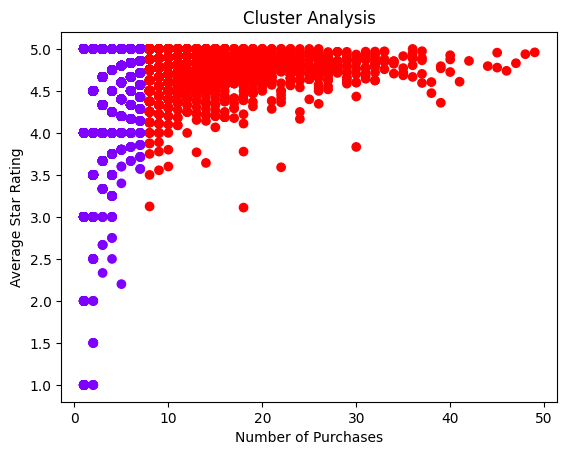

In [16]:
num_clusters = 2

kmeans = KMeans(n_clusters=num_clusters, random_state=0)

kmeans.fit(X)

cluster_labels = kmeans.labels_

user_product_info['Cluster'] = cluster_labels

# Visualize the clusters
plt.scatter(user_product_info['구매횟수'], user_product_info['평균별점'], c=cluster_labels, cmap='rainbow')
plt.xlabel('Number of Purchases')
plt.ylabel('Average Star Rating')
plt.title('Cluster Analysis')
plt.show()

In [18]:
user_product_info.groupby('Cluster').count()

,가상유저,상품명,구매횟수,평균별점
Cluster,,,,
0,33292,33292,33292,33292
1,3184,3184,3184,3184


In [19]:
user_product_info.groupby('Cluster').mean()

<ipython-input-19-e3439bbc084a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  user_product_info.groupby('Cluster').mean()


,구매횟수,평균별점
Cluster,,
0,2.148474,4.779376
1,12.952575,4.775688


In [20]:
user_product_info.groupby('Cluster').max()

,가상유저,상품명,구매횟수,평균별점
Cluster,,,,
0,"50대 이상,여성,지성,트러블",힘찬콩 탄력 크림 60ml,7,5.0
1,"50대 이상,여성,지성,트러블",힘찬콩 탄력 크림 60ml,49,5.0


In [21]:
user_product_info.groupby('Cluster').min()

,가상유저,상품명,구매횟수,평균별점
Cluster,,,,
0,"10대,남성,건성,건조함","""대용량 탄력 홈케어"" 뉴트리티브 퍼밍 팩 100ml 100ml",1,1.000000
1,"10대,남성,복합성,민감성","""탄력개선 독자기술"" 뉴트리티브 퍼밍 에센스 50ml 50ml",8,3.111111
